In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from curves import calendars
plt.matplotlib.rcParams['figure.figsize'] = (12, 8)

In [163]:
ice_ttf= pd.read_excel('curves/data/ICE_TTF_FUT.xlsx')  
ice_ttf.columns = ["tradedate"] + [f'M{i:02}' for i in range(1, 61)]
ice_ttf['tradedate'] = pd.to_datetime(ice_ttf['tradedate'])
ice_ttf.set_index('tradedate', inplace= True)
ice_ttf.head()

,M01,M02,M03,M04,M05,M06,M07,M08,M09,M10,...,M51,M52,M53,M54,M55,M56,M57,M58,M59,M60
tradedate,,,,,,,,,,,,,,,,,,,,,
2013-01-21,26.04,25.99,25.77,25.58,25.38,25.24,25.55,25.55,27.12,27.12,...,25.39,25.39,25.39,25.39,25.39,25.39,25.39,25.39,25.39,25.13
2013-01-22,26.34,26.18,25.93,25.78,25.61,25.37,25.91,25.91,27.28,27.28,...,25.47,25.47,25.47,25.47,25.47,25.47,25.47,25.47,25.47,25.20
2013-01-23,26.33,26.15,26.01,25.78,25.65,25.61,25.58,25.58,27.33,27.33,...,25.61,25.61,25.61,25.61,25.61,25.61,25.61,25.61,25.61,25.40
2013-01-24,25.85,25.81,25.71,25.54,25.41,25.33,25.38,25.69,26.13,27.13,...,23.92,23.35,23.38,23.83,24.38,25.05,26.20,27.03,27.23,27.32
2013-01-25,26.10,26.02,25.75,25.61,25.51,25.31,25.41,25.71,26.05,27.05,...,23.80,23.23,23.26,23.71,24.26,24.93,26.08,26.91,27.11,27.12


In [164]:
# Add column with first tradedate, will be used to adjust for rolls
ice_ttf[ice_ttf.index.map(calendars.is_first_trading_day)]


,M01,M02,M03,M04,M05,M06,M07,M08,M09,M10,...,M51,M52,M53,M54,M55,M56,M57,M58,M59,M60
tradedate,,,,,,,,,,,,,,,,,,,,,
2013-01-31,25.550,25.470,25.400,25.330,25.130,25.230,25.520,25.700,26.750,27.580,...,23.200,23.230,23.680,24.230,24.900,26.050,26.880,27.080,26.950,26.940
2013-02-28,26.150,26.060,25.930,25.780,25.890,26.060,26.430,27.420,28.200,28.280,...,23.370,23.820,24.370,25.040,25.990,26.820,27.020,26.860,26.850,25.720
2013-03-28,27.350,27.120,27.120,27.210,27.260,27.400,28.360,29.140,28.990,28.990,...,23.530,24.080,24.750,26.100,26.930,27.130,27.040,27.030,25.900,23.350
2013-04-30,26.400,26.300,26.390,26.370,26.900,27.270,27.600,28.060,27.950,26.980,...,23.560,24.230,25.560,26.390,26.590,25.770,25.760,24.630,22.740,22.170
2013-05-31,26.320,26.480,26.460,26.950,27.250,27.650,28.070,27.970,27.000,26.400,...,24.190,25.750,26.580,26.780,25.840,25.830,24.700,22.690,22.120,22.150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-30,76.315,78.210,78.874,78.797,79.771,80.281,80.499,80.941,81.191,83.591,...,32.760,32.715,33.225,32.150,32.915,33.760,38.819,38.947,38.365,38.758
2023-01-31,57.352,58.267,58.626,59.103,59.386,59.786,60.751,63.737,67.740,69.240,...,30.478,30.238,29.743,30.538,31.413,36.564,36.744,36.999,37.904,37.404
2023-02-28,46.665,46.900,47.339,47.543,47.828,48.524,50.874,54.733,56.273,56.923,...,27.853,27.428,28.288,29.263,32.393,33.158,33.818,32.008,31.443,30.897


<Axes: xlabel='tradedate'>

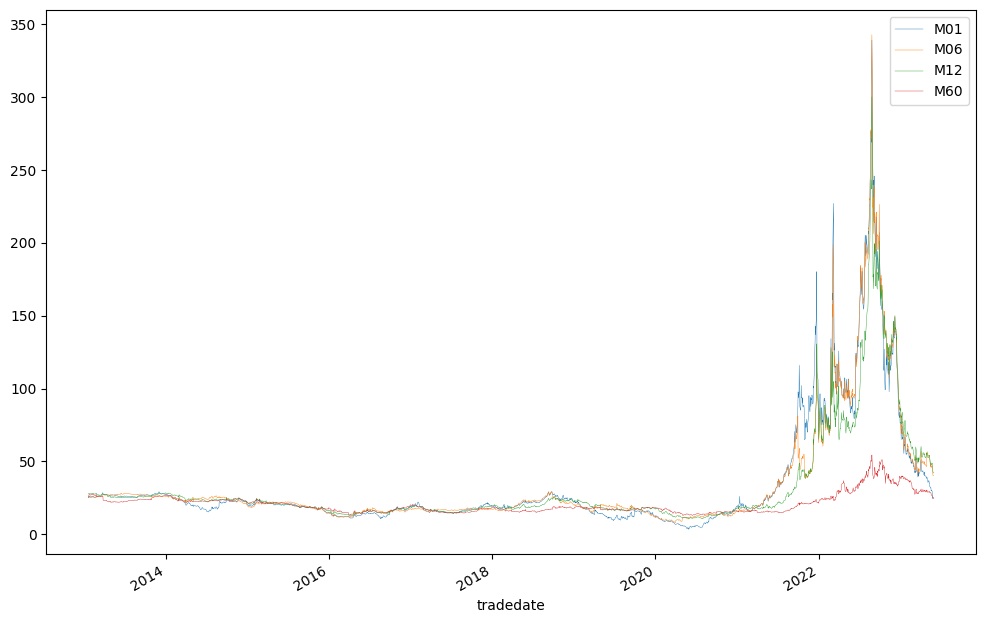

In [165]:
ice_ttf[['M01', 'M06', 'M12', 'M60']].plot(lw = 0.3)

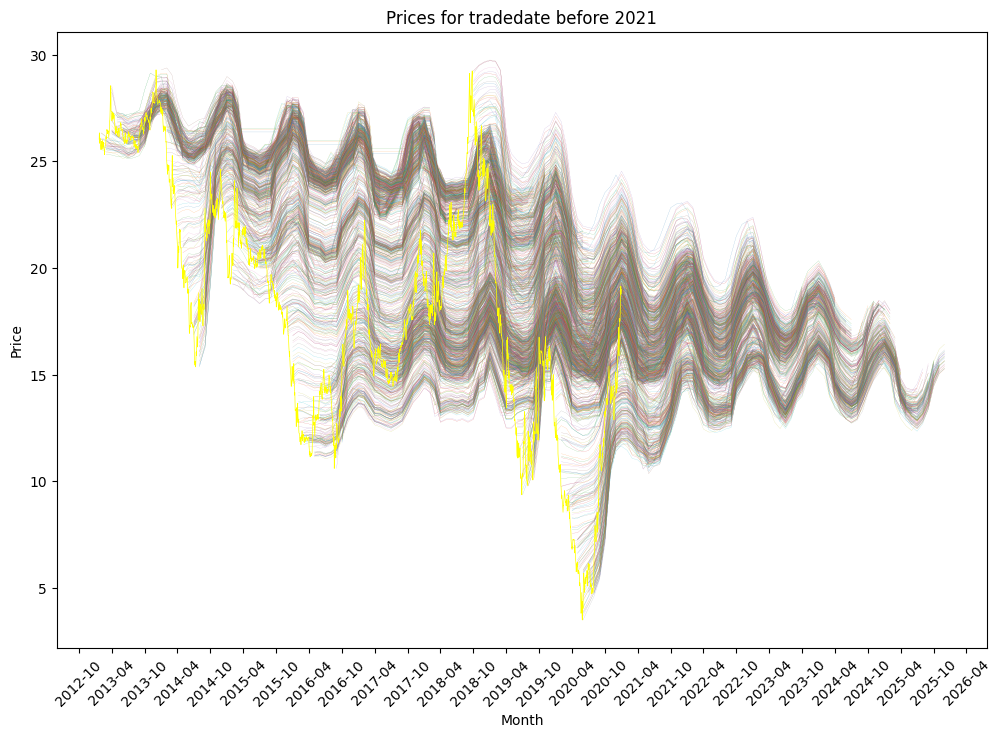

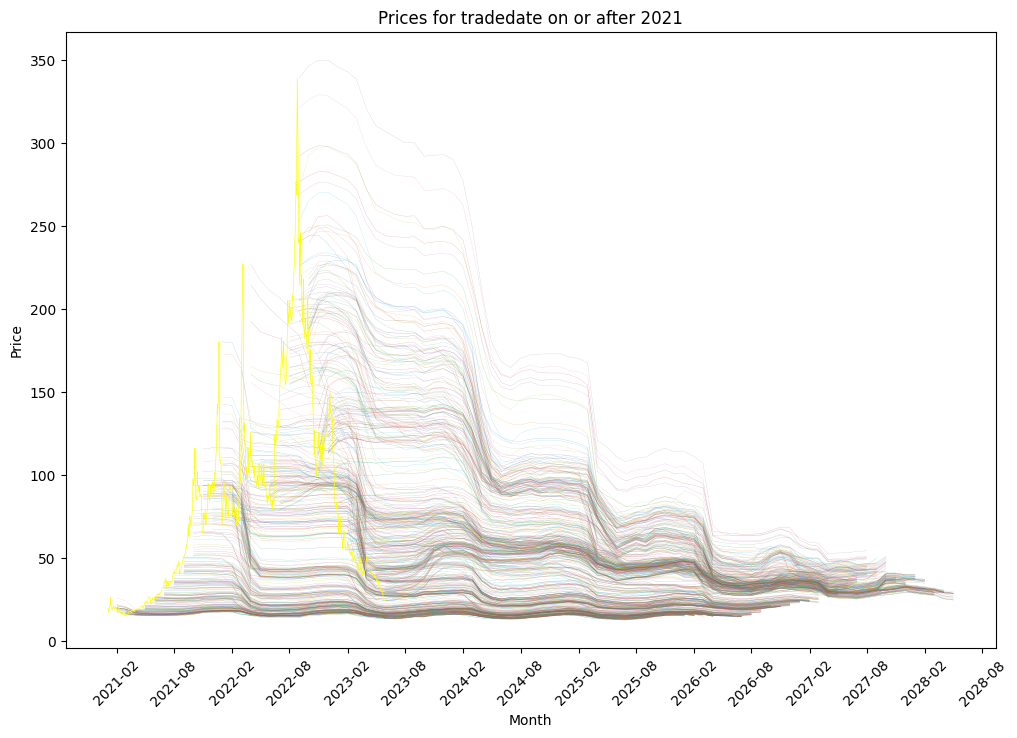

In [176]:
# Define the plotting function
def plot_curves(data, title_suffix):
    for index, curve in data.iterrows():
        date_range = pd.date_range(start=index, periods=60, freq='MS')
        plt.plot(date_range, curve['M01':'M60'], lw = 0.08)
    plt.plot( data['M01'], lw = 0.5, color = 'yellow')
    plt.title(f'Prices for tradedate {title_suffix}')
    plt.xlabel('Month')
    plt.ylabel('Price')
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
    plt.xticks(rotation=45)
    plt.show()

# Split the data based on the condition
before_2021 = ice_ttf[ice_ttf.index < pd.Timestamp('2020-12-31')]
after_2021 = ice_ttf[ice_ttf.index >= pd.Timestamp('2021-01-01')]

# Call the plotting function for each subset
plot_curves(before_2021, 'before 2021')
plot_curves(after_2021, 'on or after 2021')

<Axes: xlabel='tradedate'>

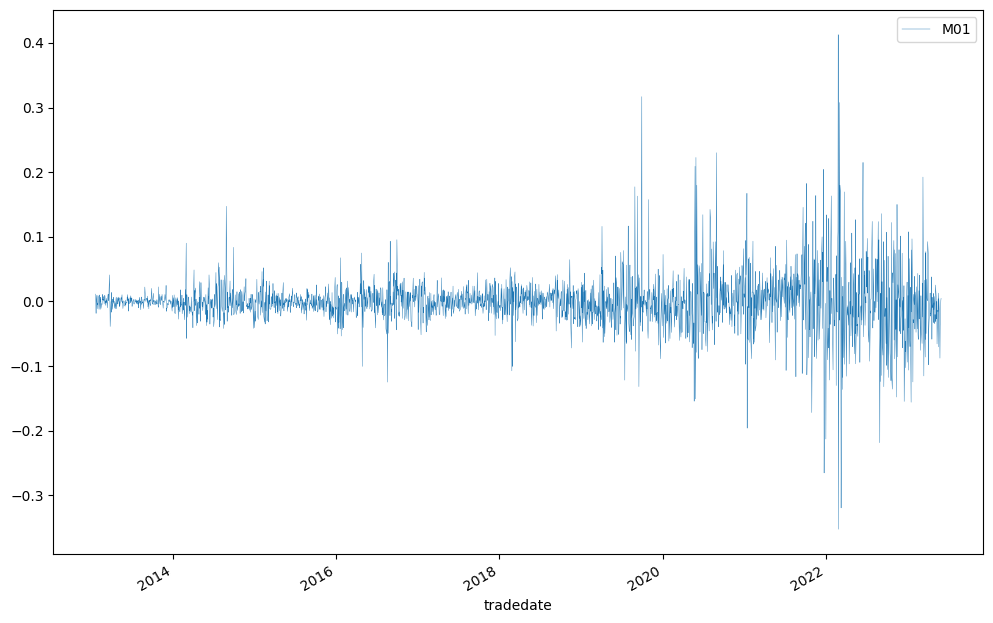

In [167]:

# Calculate log returns for each month column while preserving 'tradedate'
#ice_ttf_log_returns = np.log(ice_ttf.iloc[:, 1:] / ice_ttf.iloc[:, 1:].shift(1))
ice_ttf_lr = np.log(ice_ttf / ice_ttf.shift(1))

# Insert the 'tradedate' column from the original DataFrame into the log returns DataFrame as the first column
ice_ttf_lr.dropna(inplace=True)
ice_ttf_lr[['M01']].plot(lw = 0.3)


Remove all first tradedates from log return

In [168]:
# Add column with first tradedate, will be used to adjust for rolls
not_first_tradedate = ~ice_ttf_lr.index.map(calendars.is_first_trading_day)
#ice_ttf_lr[~not_first_tradedate]
#ice_ttf_lr = ice_ttf_lr[ice_ttf_lr.abs() > 0.05].dropna(axis=0, how='all')



<Axes: xlabel='tradedate'>

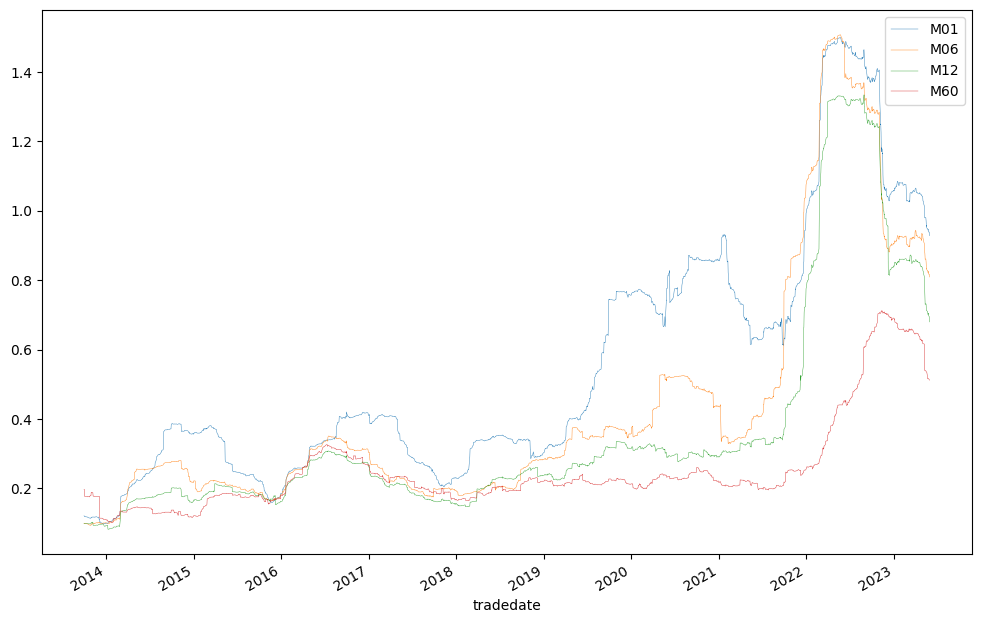

In [169]:
# Assuming 'ice_ttf_log_returns' is your DataFrame with log returns and 'tradedate' as the first column
# Define the window size for the rolling calculation
window_size = 180  # 365 days for the rolling window
dt = 1/252
# Calculate the rolling standard deviations for each month column, excluding 'tradedate'
rolling_std = ice_ttf_lr.rolling(window=window_size).std()*np.sqrt(1/dt)

#rolling_std.iloc[:,1:].plot(legend = False, lw=0.1)
rolling_std[['M01', 'M06', 'M12', 'M60']].plot(lw = 0.3)
# The resulting 'rolling_std' DataFrame contains the rolling 90-day standard deviations for each month column with 'tradedate' as the first column

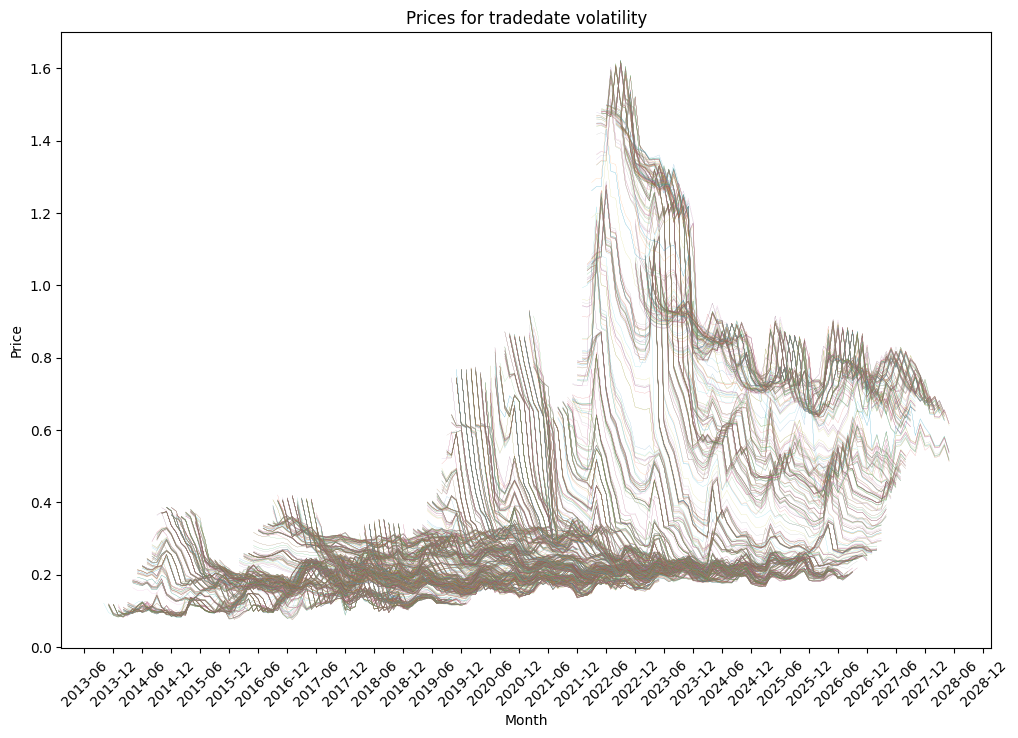

In [175]:
#rolling_std.T.plot(lw = 0.3, legend = False)
# Define the plotting function
def plot_volatility(data, title_suffix):
    for index, curve in data.iterrows():
        date_range = pd.date_range(start=index, periods=60, freq='MS')
        plt.plot(date_range, curve['M01':'M60'], lw = 0.08)
    plt.title(f'Rolling volatility for tradedate {title_suffix}')
    plt.xlabel('Month')
    plt.ylabel('Price')
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
    plt.xticks(rotation=45)
    plt.show()

plot_volatility(rolling_std, "volatility")

### EWMA Volatility

<Axes: xlabel='tradedate'>

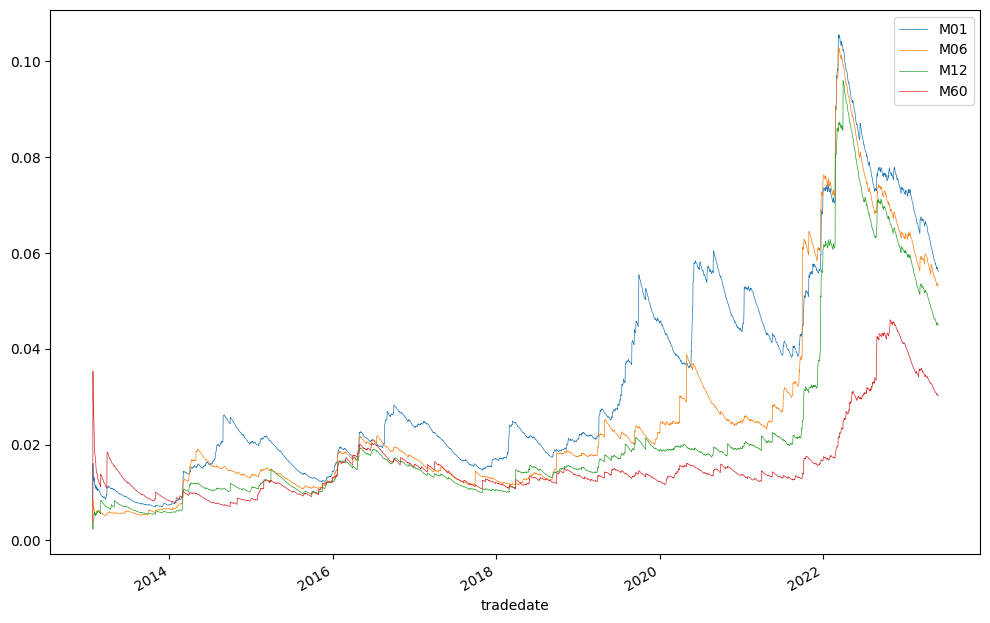

In [171]:
span = 180  # Example span value

# Calculate the EWMA standard deviations for each month column, excluding 'tradedate'
ewma_std = ice_ttf_lr.ewm(span=span, adjust=False).std()

ewma_std[['M01', 'M06', 'M12', 'M60']].plot(lw = 0.5)

<Axes: xlabel='tradedate'>

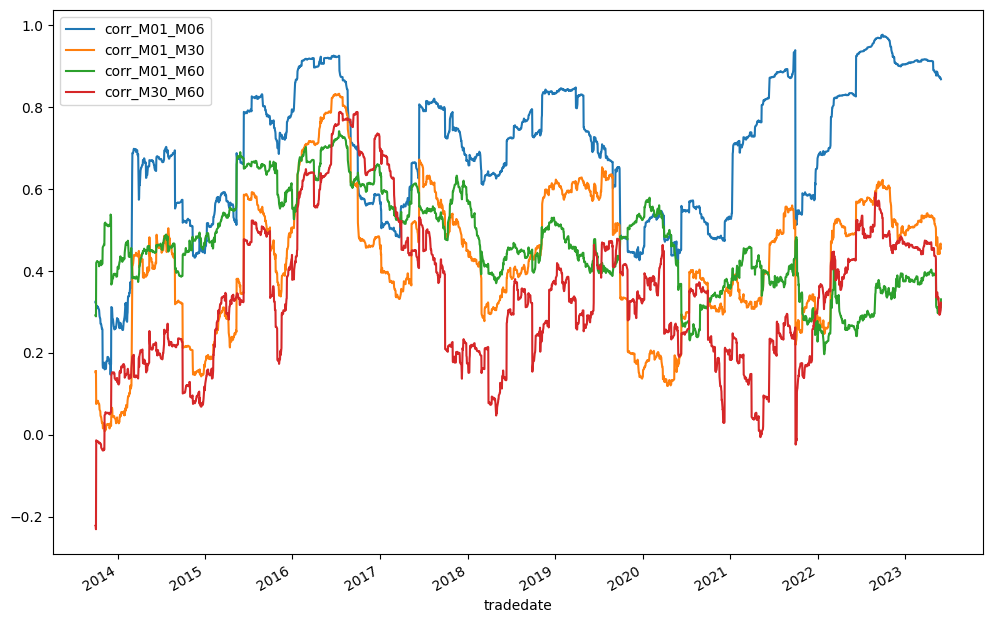

In [172]:
# Assuming 'ice_ttf_log_returns' is your DataFrame with log returns and 'tradedate' as the first column

# Define the window size for the rolling calculation
window_size = 180  # days for the rolling window

# Calculate the rolling correlation between 'M01' and 'M06'
rolling_corr_M01_M06 = ice_ttf_lr['M01'].rolling(window=window_size).corr(ice_ttf_lr['M06'])
rolling_corr_M01_M30 = ice_ttf_lr['M01'].rolling(window=window_size).corr(ice_ttf_lr['M30'])
rolling_corr_M01_M60 = ice_ttf_lr['M01'].rolling(window=window_size).corr(ice_ttf_lr['M60'])
rolling_corr_M30_M60 = ice_ttf_lr['M30'].rolling(window=window_size).corr(ice_ttf_lr['M60'])

# Create a new DataFrame to hold the rolling correlation results with 'tradedate'
rolling_corr_df = pd.DataFrame({
    'corr_M01_M06': rolling_corr_M01_M06,
    'corr_M01_M30': rolling_corr_M01_M30,
    'corr_M01_M60': rolling_corr_M01_M60,
    'corr_M30_M60': rolling_corr_M30_M60
})

rolling_corr_df[['corr_M01_M06', 'corr_M01_M30', 'corr_M01_M60', 'corr_M30_M60' ]].plot()
# The resulting 'rolling_corr_df' DataFrame contains the rolling correlations with 'tradedate'